# Retail case study by mohammed godil

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
customer = pd.read_csv('Customer.csv')
product = pd.read_csv('prod_cat_info.csv')
trans = pd.read_csv('Transactions.csv')

In [3]:
first = pd.merge(left =trans  , right = customer , 
         left_on = 'cust_id' , right_on = 'customer_Id'  , how = 'left')

In [4]:
customer_final = pd.merge(left = first , right = product ,
                left_on = ['prod_cat_code','prod_subcat_code'] ,
                right_on = ['prod_cat_code' , 'prod_sub_cat_code'] , 
                how = 'left' )

In [5]:
customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0,Books,12,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0,Clothing,4,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children


In [6]:
# 2.(a)
customer_final.dtypes

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [7]:
customer_final['DOB'] = pd.to_datetime(customer_final.DOB,format = '%d-%m-%Y')

In [8]:
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'])

In [9]:
customer_final.dropna(axis = 0 , how = 'any',inplace = True)

In [10]:
customer_final.dtypes

transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
dtype: object

In [11]:
customer_final.drop_duplicates(inplace = True)

In [12]:
customer_final.isna().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_subcat_code     0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
customer_Id          0
DOB                  0
Gender               0
city_code            0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [13]:
#customer_final.loc[: : ,['customer_Id' ,'city_code'  ,'prod_subcat_code' ,'prod_cat_code','prod_sub_cat_co]] = customer_final.loc[: : ,['customer_Id' ,'city_code' ,'transaction_id' ,'cust_id' ]].applymap(lambda x : str(x))

In [14]:
customer_final.dtypes

transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
dtype: object

In [15]:
customer_final.loc[(customer_final.Gender == 'M') & (customer_final.prod_cat == 'Electronics'),'total_amt'].sum()

5705871.925

In [16]:
# 2.(b)
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-05-11,F,8.0,Electronics,5,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,1981-06-08,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,272357,1982-10-09,F,6.0,Electronics,8,Personal Appliances
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,273667,1981-05-29,M,9.0,Home and kitchen,11,Bath
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,271489,1971-04-21,M,9.0,Home and kitchen,12,Tools
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,275108,1971-11-04,F,8.0,Clothing,3,Kids
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,269014,1979-11-27,F,3.0,Electronics,8,Personal Appliances


In [17]:

customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,271982,1976-08-10,M,8.0,Books,10,Non-Fiction
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,273982,1991-10-12,M,4.0,Electronics,4,Mobiles
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,273031,1980-01-17,F,8.0,Books,6,DIY
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,272049,1975-06-28,F,6.0,Home and kitchen,11,Bath
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,266866,1974-04-18,M,4.0,Footwear,4,Kids
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,274550,1972-02-21,M,7.0,Books,12,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,270022,1984-04-27,M,9.0,Clothing,4,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,271020,1976-06-20,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,270911,1970-05-22,M,2.0,Books,11,Children
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,271961,1982-01-15,M,1.0,Books,11,Children


In [18]:
customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'customer_Id', 'DOB', 'Gender', 'city_code', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

In [19]:
# 2.(C)

In [20]:
xyz = customer_final.loc[: : ,['Qty' , 'Rate', 'Tax', 'total_amt']]

In [21]:
def abc(x):
    return pd.Series([x.min(),x.max(),x.quantile(0.25) 
            ,x.quantile(0.75) , x.quantile(.50)] , 
            index = ['min' , 'max','Q1' , 'Q3' , 'Median'])

In [22]:
xyz.apply(abc)

,Qty,Rate,Tax,total_amt
min,-5.0,-1499.0,7.35,-8270.925
max,5.0,1500.0,787.50,8287.500
Q1,1.0,312.0,98.28,762.450
Q3,4.0,1110.0,365.82,3570.255
Median,3.0,710.0,199.08,1756.950


In [23]:
# 2.(d)

In [24]:
cross = customer_final.select_dtypes(include = 'object')
cross

,Store_type,Gender,prod_cat,prod_subcat
0,e-Shop,M,Clothing,Women
1,e-Shop,F,Electronics,Computers
2,TeleShop,M,Books,DIY
3,e-Shop,M,Home and kitchen,Bath
4,TeleShop,M,Books,DIY
...,...,...,...,...
23048,e-Shop,M,Books,Academic
23049,e-Shop,M,Clothing,Mens
23050,MBR,M,Home and kitchen,Furnishing
23051,TeleShop,M,Books,Children


In [25]:
cross.describe()

,Store_type,Gender,prod_cat,prod_subcat
count,23023,23023,23023,23023
unique,4,2,6,18
top,e-Shop,M,Books,Women
freq,9299,11798,6061,3044


In [26]:
customer_final.dtypes

transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
dtype: object

In [27]:
# 3

In [28]:
#third_wala = customer_final.select_dtypes(include = ['int64' , 'float64'])
third_wala = customer_final.loc[: : , ['Qty' , 'Rate' , 'Tax' ,'total_amt']]

In [29]:
list(enumerate(third_wala))

[(0, 'Qty'), (1, 'Rate'), (2, 'Tax'), (3, 'total_amt')]

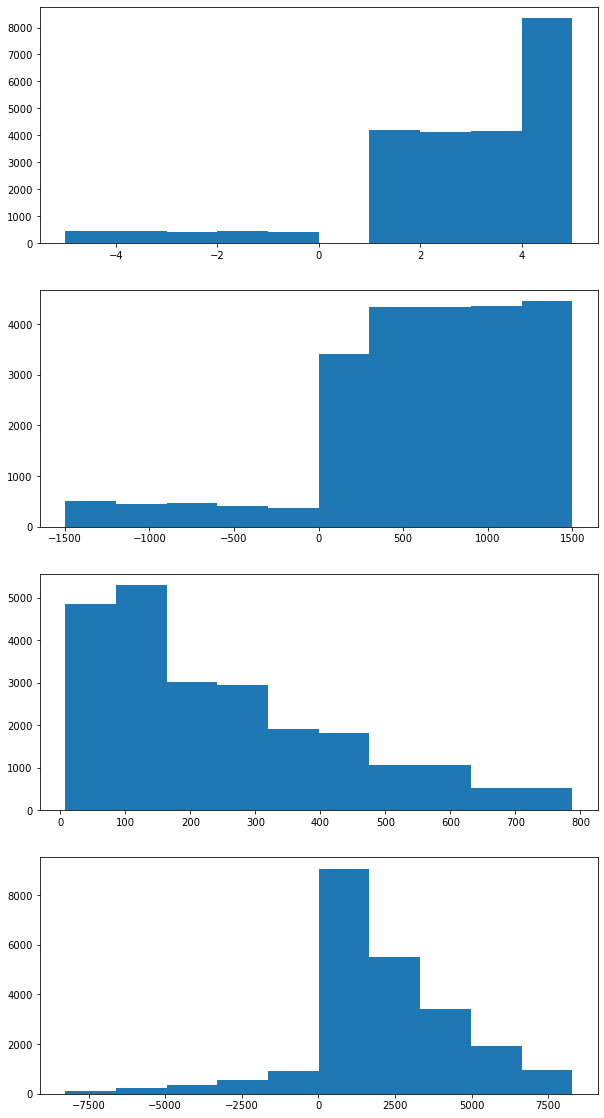

In [30]:
plt.figure(figsize = (10,20))
for i in enumerate(third_wala):
    plt.subplot(4,1,i[0]+1)
    plt.hist(i[1] , data = customer_final)

In [31]:
features = customer_final.loc[: : , [ 'Gender', 
                    'Store_type','prod_cat','prod_subcat']]

In [32]:
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [33]:
list(enumerate(features))

[(0, 'Gender'), (1, 'Store_type'), (2, 'prod_cat'), (3, 'prod_subcat')]

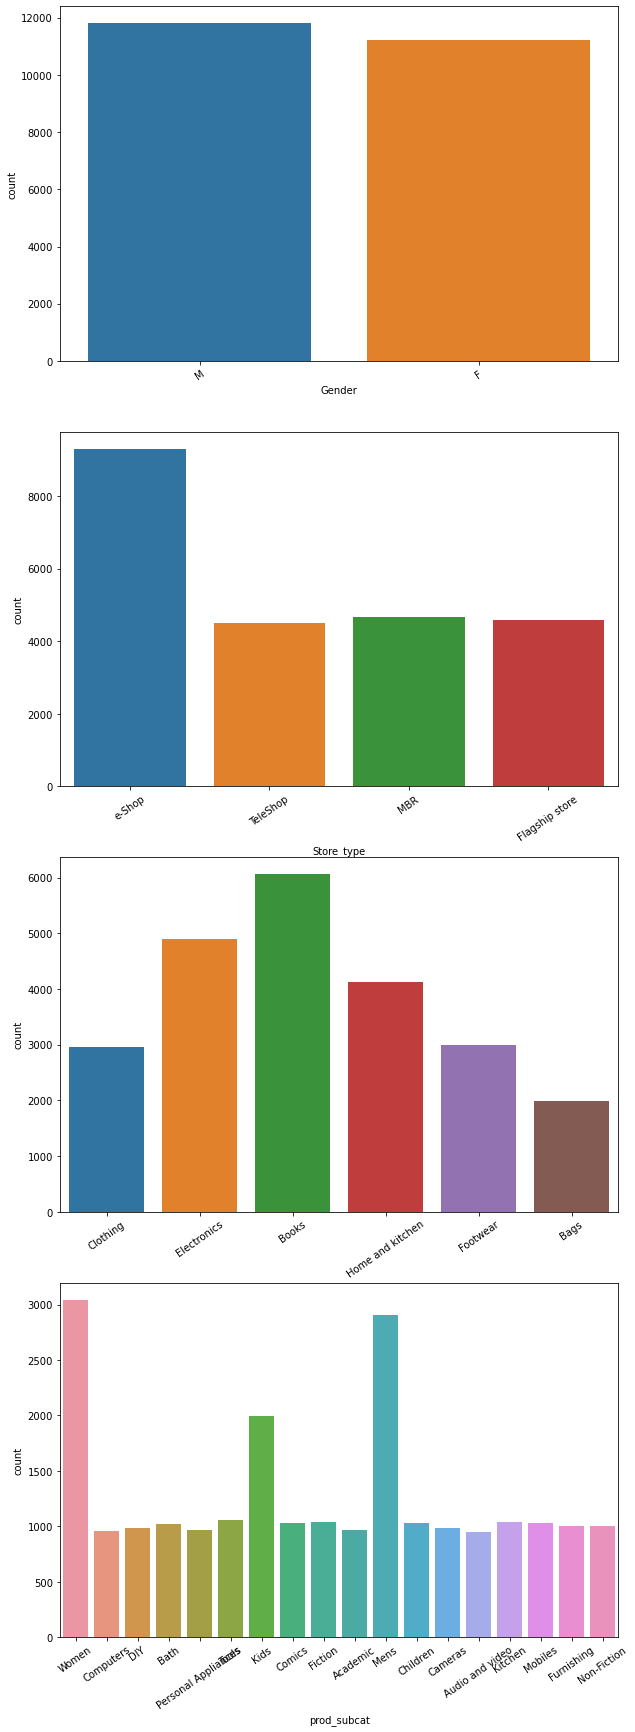

In [34]:
plt.figure(figsize = (10,30))
for i in enumerate(features):
    plt.subplot(4,1,i[0]+1)
    sns.countplot(i[1] ,data = customer_final)
    plt.xticks(rotation = 35)

In [35]:
# (4)

In [36]:
# (b)
customer_final.loc[customer_final.total_amt < 0,'transaction_id'].count()

2163

In [37]:
customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'customer_Id', 'DOB', 'Gender', 'city_code', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

In [38]:
customer_final.isnull().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_subcat_code     0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
customer_Id          0
DOB                  0
Gender               0
city_code            0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [39]:
b = customer_final.tran_date.min()
b.strftime(format = '%m-%d-%Y')

'01-02-2011'

In [40]:
a = customer_final.tran_date.max()
a.strftime(format = '%m-%d-%Y')

'12-02-2014'

In [41]:
print('the time period of our dataset is from',b ,'till' , a)

the time period of our dataset is from 2011-01-02 00:00:00 till 2014-12-02 00:00:00


In [42]:
a = customer_final.tran_date.min()
b = customer_final.tran_date.max()

In [43]:
(b-a).days

1430

In [44]:
# (5)

In [45]:
customer_final.groupby(["Gender","prod_cat"])[["Qty"]].sum()


Qty
Gender prod_cat              
F      Bags              2364
       Books             7080
       Clothing          3425
       Electronics       5827
       Footwear          3721
       Home and kitchen  4898
M      Bags              2345
       Books             7586
       Clothing          3748
       Electronics       6480
       Footwear          3561
       Home and kitchen  5046

In [46]:
# (6)

In [47]:
fifth_wala = customer_final.groupby('city_code').cust_id.count().sort_values(ascending = False)

In [48]:
round(fifth_wala.head(1)*100/fifth_wala.sum(),1)

city_code
4.0    10.5
Name: cust_id, dtype: float64

In [49]:
# (7)

In [50]:
round(customer_final.groupby('Store_type')[['total_amt' , 'Qty']].sum(),2).sort_values(by = ['total_amt' ,'Qty' ],ascending = False).head(1)

,total_amt,Qty
Store_type,,
e-Shop,19838944.58,22785


In [51]:
# (8)

In [52]:
eight_wala = customer_final[customer_final.prod_cat.isin(['Clothing' , 'Electronics'])]


In [53]:
eight_wala.loc[eight_wala.Store_type == 'Flagship store' ,'total_amt' ].sum()

3408936.0500000003

In [54]:
# (9)

In [55]:
customer_final.loc[((customer_final.Gender == 'M') & (customer_final.prod_cat == 'Electronics')),'total_amt'].sum()

5705871.925

In [56]:
# (10)

In [57]:
tenth_wala = customer_final[customer_final.total_amt >0]

In [58]:
tenth = tenth_wala.groupby('cust_id').cust_id.count()

In [59]:
tenth[tenth > 10]

cust_id
266794    11
270535    11
270803    11
272741    11
273014    11
274227    11
Name: cust_id, dtype: int64

In [60]:
# (11)

In [61]:
#eleventh = pd.Timestamp.now()
eleventh = customer_final.tran_date

In [62]:
eleventh_1 = customer_final.DOB

In [63]:
customer_final['age'] = round((eleventh - eleventh_1).dt.days/365.25,0)


In [64]:
eleven = customer_final[(customer_final.age >= 25) & 
                        (customer_final.age <= 35)]

In [65]:
eleven

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,age
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women,32.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,1981-06-08,M,3.0,Home and kitchen,11,Bath,33.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,272357,1982-10-09,F,6.0,Electronics,8,Personal Appliances,31.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,273667,1981-05-29,M,9.0,Home and kitchen,11,Bath,33.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,269014,1979-11-27,F,3.0,Electronics,8,Personal Appliances,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,271982,1976-08-10,M,8.0,Books,10,Non-Fiction,34.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,273031,1980-01-17,F,8.0,Books,6,DIY,31.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,270022,1984-04-27,M,9.0,Clothing,4,Mens,27.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,271020,1976-06-20,M,8.0,Home and kitchen,2,Furnishing,35.0


In [66]:
#eleven.groupby(['Electronics' , 'Books']).total_amt.sum()

In [67]:
# (a)
eleven[eleven.prod_cat.isin(['Electronics' , 'Books'])].groupby('prod_cat').total_amt.sum()

prod_cat
Books          6133796.435
Electronics    5150337.595
Name: total_amt, dtype: float64

In [68]:
# (b)

In [69]:
a = '01 jan 2014'
b = '01 mar 2014'
a_1 = pd.to_datetime(a)
b_1 = pd.to_datetime(b)

In [70]:
a_1

Timestamp('2014-01-01 00:00:00')

In [71]:
ba = eleven.loc[(eleven.tran_date>= a_1) & (eleven.tran_date <= b_1),'total_amt'].sum()

In [72]:
ba

680141.865

In [73]:
print('total amt spend by the customer between 1st Jan, 2014 to 1st Mar, 2014 is ',eleven[(eleven.tran_date >= '2014-01-01') & (eleven.tran_date <= '2014-03-01')].total_amt.sum())

total amt spend by the customer between 1st Jan, 2014 to 1st Mar, 2014 is  680141.865
